In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
from mplcursors import cursor as mpl_cursor
from matplotlib.widgets import Button

In [16]:
excel_file_path = 'Data/IPCH.xlsx'
sheet_name = 'Sheet 1'
skip_rows = 8  # Skip the first 8 rows (start from the 9th row)

# Read the specific sheet from the Excel file, skipping the specified rows
data = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skip_rows)

df = data.iloc[1:-6]

# Delete rows where the first column starts with "Euro"
df = df[~df.iloc[:, 0].str.startswith("Euro")]

# Replace ":" with NaN in the entire DataFrame
df.replace(":", np.nan, inplace=True)

# Filter and keep only columns that do not start with "Unnamed"
data = df.loc[:, ~df.columns.str.startswith('Unnamed')]



/opt/mamba/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [126]:

# STEP 1 #
# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# Coords covering Europe & Russia made with http://bboxfinder.com
#bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox = make_bbox(-32.800788,33.886212,35.324212,71.763749)



# STEP 2 #
# Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

# STEP 3 #
# Load europe
europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = europe[europe.continent == 'Europe']

# Use bbox as clipping border for Europe
europe = europe.overlay(bbox_gdf, how="intersection")


/tmp/ipykernel_603/868356610.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [128]:
merged_data = europe.merge(data, how='left', left_on='name', right_on='TIME')

In [129]:
merged_data.plot(column='2022-02', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate the map with data values


# Set title and turn off axis
ax.set_title('Data Visualization on European Map')
ax.set_axis_off()

# Display the map
plt.show()

<Figure size 640x480 with 0 Axes>

In [85]:
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,TIME,1996-01,1996-02,1996-03,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((47.67591 45.64149, 46.68201 44...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",Norway,69.20,69.30,69.50,...,128.50,129.70,131.20,131.80,132.70,133.10,131.80,131.60,133.10,NaN
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((9.39000 43.00998, 9.56002 42.1...",France,74.13,74.42,74.90,...,118.55,119.76,120.55,120.46,120.71,120.77,122.10,121.40,121.61,121.27
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.46827 59.43239, 12.30037 60.11793...",Sweden,75.41,75.60,76.14,...,125.00,125.57,125.82,125.91,127.17,126.93,126.72,127.19,127.29,NaN
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((29.22951 55.91834, 29.37157 55.67009...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.41206 52.28869, 32.71576 52.23847...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.52754 53.47012, 23.80493 53.08973...",Poland,43.00,43.60,44.30,...,141.10,142.70,143.80,144.10,144.20,143.80,143.90,143.70,144.20,NaN
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.90375 47.71487, 16.34058 47.71290...",Austria,71.34,71.55,71.77,...,128.15,128.88,129.88,130.06,130.42,130.17,130.59,131.75,132.24,132.48
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.64082 48.15024, 22.71053 47.88219...",Hungary,29.31,30.01,30.48,...,158.08,159.42,160.57,159.99,160.55,161.12,162.37,162.49,162.10,NaN
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.85782 48.36821, 27.52254 48.46712...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_603/3675707781.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[date]):


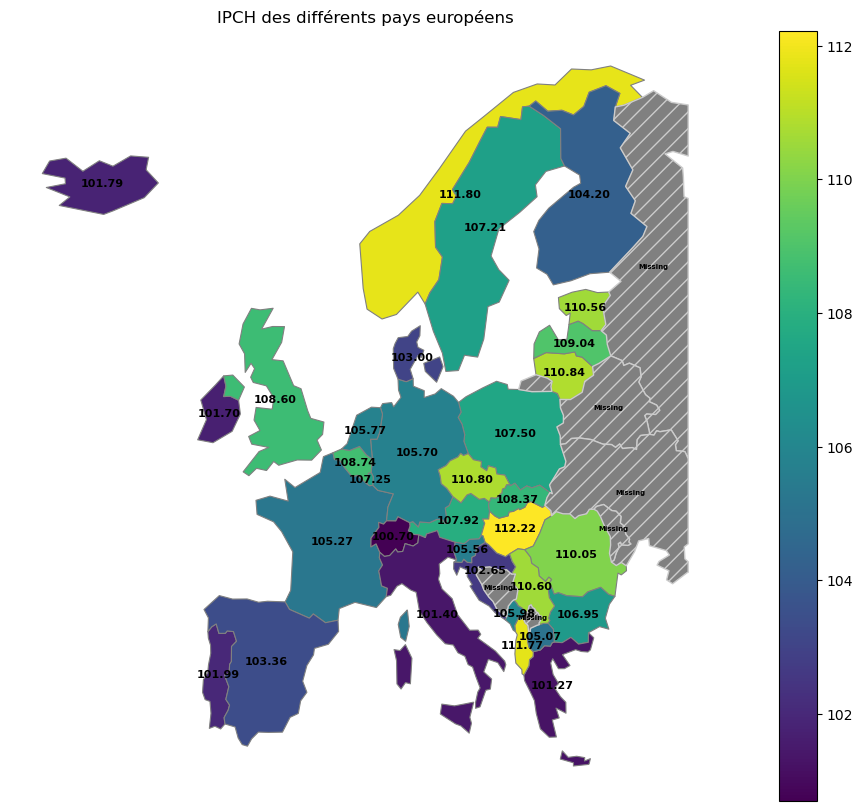

In [137]:
date = '2020-02'
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column=date, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
merged_data[merged_data[date].isna()].plot(ax=ax, color='gray', hatch='//', edgecolor='0.8')
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[date]):
    if np.isnan(label):
        ax.text(x, y, 'Missing', fontsize=5, ha='center', va='center', color='black', fontweight='bold')
    else:
        ax.text(x, y, f'{label:.2f}', fontsize=8, ha='center', va='center', color='black', fontweight='bold')

#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['1996-02']):
#    ax.text(x, y, f'{label:.2f}', fontsize=8, ha='center', va='center', color='white', fontweight='bold')
ax.set_title('IPCH des différents pays européens')
ax.set_axis_off()
legend = ax.get_legend()
legend
plt.show()


In [17]:
data

,TIME,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
7,Belgium,69.91,69.98,70.12,70.47,70.61,70.47,70.40,70.40,70.54,...,125.99,126.23,124.65,124.91,124.79,124.05,127.20,126.73,127.15,127.12
8,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.12,132.90,133.63,133.30,133.45,134.99,135.61,135.18,135.44,NaN
9,Czechia,57.00,57.30,57.60,58.10,58.40,58.90,59.40,59.50,59.60,...,147.30,147.70,147.50,147.90,148.40,149.00,149.30,148.10,148.10,NaN
10,Denmark,70.40,70.80,71.30,71.50,71.70,71.60,71.50,71.60,72.00,...,118.00,117.80,118.10,116.30,116.70,119.10,118.10,117.80,118.10,NaN
11,Germany,75.10,75.60,75.70,75.60,75.70,75.80,76.00,75.90,75.90,...,123.80,125.10,125.80,125.60,126.10,126.70,127.20,127.40,127.20,NaN
12,Estonia,42.87,44.24,44.95,45.72,45.95,46.23,46.36,45.92,46.11,...,146.14,147.20,150.04,150.08,151.30,150.56,151.25,151.17,150.45,150.47
13,Ireland,68.10,68.60,68.90,68.80,68.90,69.10,68.90,69.30,69.70,...,115.80,116.90,117.20,117.50,118.40,118.60,119.20,119.30,119.50,118.20
14,Greece,59.04,58.92,60.64,61.25,61.74,61.86,60.76,60.70,62.11,...,112.51,114.28,115.55,116.17,117.23,116.08,115.87,118.04,118.17,116.91
15,Spain,63.95,64.08,64.34,64.73,64.99,64.93,64.99,65.19,65.38,...,117.82,119.06,119.61,119.44,120.13,120.03,120.68,121.38,121.69,121.01
16,France,74.13,74.42,74.90,74.99,75.19,75.11,74.94,74.78,75.02,...,118.55,119.76,120.55,120.46,120.71,120.77,122.10,121.40,121.61,121.27


In [26]:
geojson

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


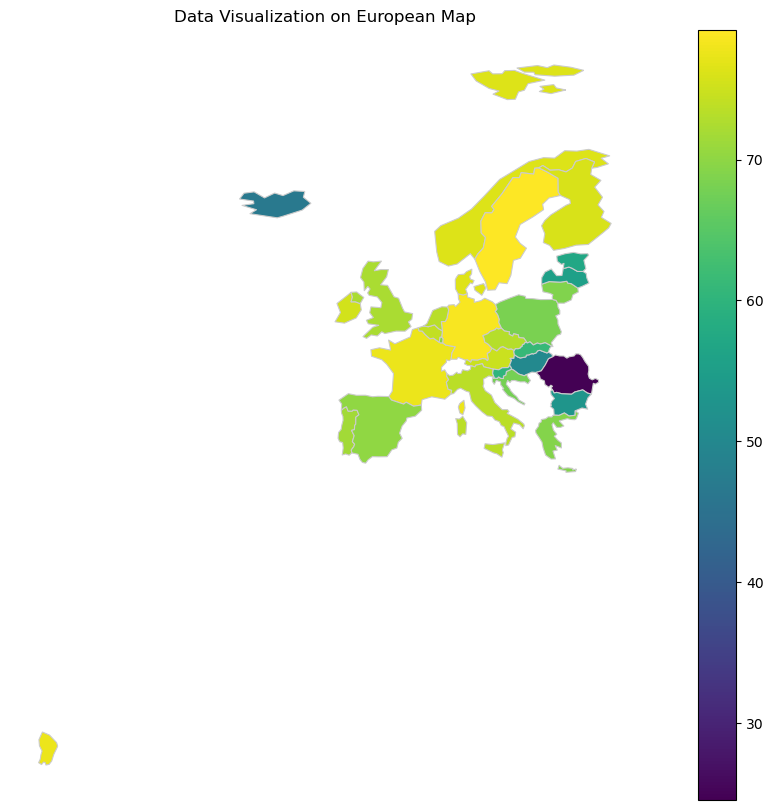

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='2000-02', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Data Visualization on European Map')
ax.set_axis_off()
legend = ax.get_legend()
legend
plt.show()


/tmp/ipykernel_603/347125647.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['2022-02']):


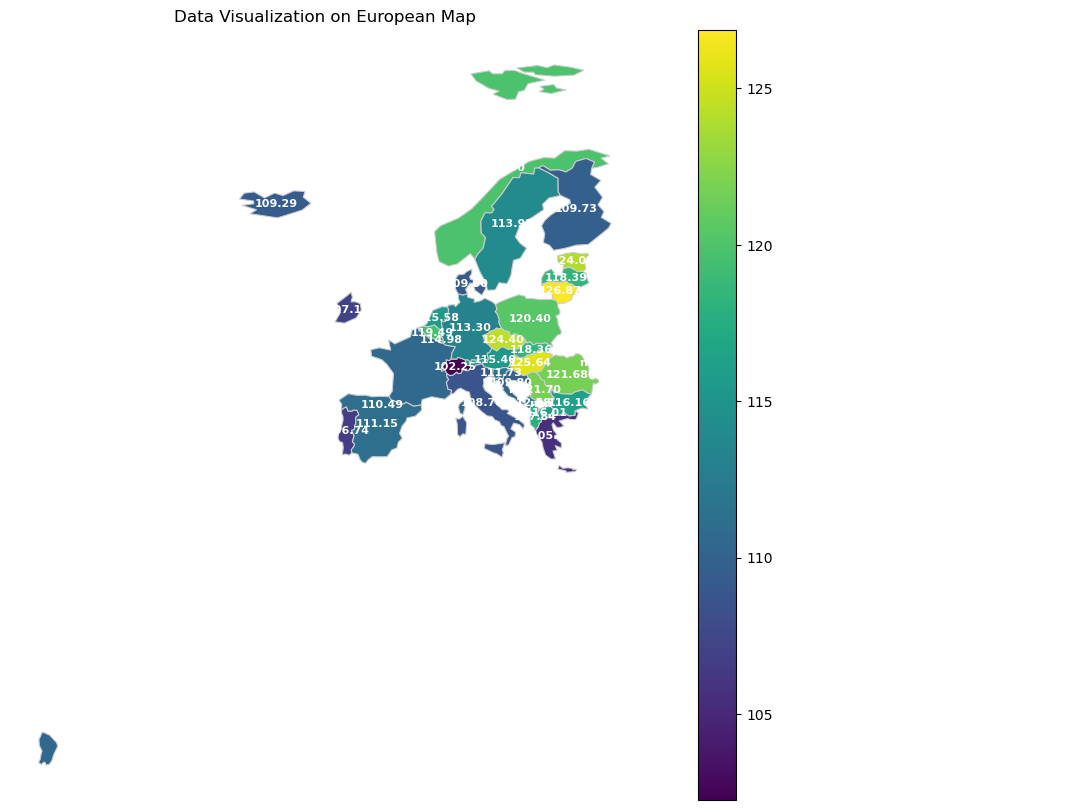

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map using a colormap
merged_data.plot(column='2022-02', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate the map with data values
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['2022-02']):
    ax.text(x, y, f'{label:.2f}', fontsize=8, ha='center', va='center', color='white', fontweight='bold')

# Set title and turn off axis
ax.set_title('Data Visualization on European Map')
ax.set_axis_off()

# Display the map
plt.show()

In [28]:
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,TIME,1996-01,1996-02,1996-03,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",Norway,69.20,69.30,69.50,...,128.50,129.70,131.20,131.80,132.70,133.10,131.80,131.60,133.10,NaN
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",France,74.13,74.42,74.90,...,118.55,119.76,120.55,120.46,120.71,120.77,122.10,121.40,121.61,121.27
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,75.41,75.60,76.14,...,125.00,125.57,125.82,125.91,127.17,126.93,126.72,127.19,127.29,NaN
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",Poland,43.00,43.60,44.30,...,141.10,142.70,143.80,144.10,144.20,143.80,143.90,143.70,144.20,NaN
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,71.34,71.55,71.77,...,128.15,128.88,129.88,130.06,130.42,130.17,130.59,131.75,132.24,132.48
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,29.31,30.01,30.48,...,158.08,159.42,160.57,159.99,160.55,161.12,162.37,162.49,162.10,NaN
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.columns

Index(['TIME', '1996-01', '1996-02', '1996-03', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08', '1996-09',
       ...
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11'],
      dtype='object', length=336)

In [22]:
geojson

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
1,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."


In [34]:
shapefile_path = 'CNTR_BN_01M_2020_3035.shp'
gdf_countries = gpd.read_file(shapefile_path)

DriverError: Unable to open CNTR_BN_01M_2020_3035.shx or CNTR_BN_01M_2020_3035.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.